# Simple Example of Using _FinClust_
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JakRys/finclust/blob/main/examples/simple_example.ipynb)

## Intro

In [ ]:
!python -m pip install git+https://github.com/JakRys/finclust

In [ ]:
!pip install yfinance

## Get Data

In [10]:
symbols = ['AAPL', 'MSFT', 'GE', 'CSCO', 'INTC', 'T', 'AMZN', 'DIS', 'PFE', 'BAC', 'JNJ', 'XOM', 'GOOG', 'WMT', 'VZ', 'F', 'C', 'KO', 'TSLA', 'META', 'PG', 'HD', 'IBM', 'MCD', 'JPM', 'NVDA', 'ORCL', 'MRK', 'MO', 'BA', 'CVX', 'AMD', 'SBUX', 'NFLX', 'PEP', 'WFC', 'QCOM', 'DELL', 'CAT', 'V', 'NOK', 'GM', 'BABA', 'NKE', 'BRK-B', 'SIRI', 'COST', 'GOOGL', 'MMM', 'BP']
len(symbols)

50

In [11]:
import yfinance as yf

data = yf.download(
    tickers=symbols,
    start="2012-01-01",
    end="2022-01-01",
    interval="1d",
)
data.dropna(axis=1, how="all", inplace=True) 

[*********************100%***********************]  50 of 50 completed


In this example, we will use only price data (represented by the daily close price).

In [12]:
data = data["Adj Close"]
data.shape

(2517, 50)

## Example of Run

In this case we will use the _AgglomerativeClustering_ method, which will be evaluated on a time series of a quarter of a year (`window = timedelta(weeks=16)`).
The clustering will be evaluated every month (`step = timedelta(weeks=4)`).
The correlation coefficient will be used to calculate the affinities (`affinity_func = np.corrcoef`).
We want to get 5 clusters at the output (`n_clusters=5`).
For the evaluation we will use a method from the [QuantStats](https://github.com/ranaroussi/quantstats) library (implemented with `QuantstatsEvaluator`).

In [13]:
import numpy as np
def my_corr(X):
    return 1 - np.corrcoef(X) 

In [48]:
data.shape, data.index.nunique()

((2517, 50), 2517)

In [81]:
## Import the required modules
from datetime import timedelta
import numpy as np

from finclust import PortfolioManager
from finclust.clustering import ScikitClusterer
from finclust.evaluation import QuantstatsEvaluator

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances, nan_euclidean_distances

## Create instance of PortfolioManager
mgr = PortfolioManager(
    window = timedelta(weeks=16),
    step = timedelta(weeks=4),
    # affinity_func = np.corrcoef,
    affinity_func = nan_euclidean_distances,
    clusterer = ScikitClusterer(
        cluster_method = AgglomerativeClustering(affinity="precomputed", linkage="single", n_clusters=5),
    ),
    evaluator = QuantstatsEvaluator(),
    # evaluate_baseline=False,
)
## Run the process
mgr.run(data=data)

10:57:06.407 Calculating returns
10:57:06.413 Calculating affinities
10:57:06.554 Calculating clusters
10:57:06.670 Evaluating baseline
10:57:07.006 Calculating returns of portfolios
10:57:07.815 Evaluating cluster portfolios
10:57:09.030 Run completed.
____________________________________
Duration of the run: 0:00:02.624054.



,Baseline,AgglomerativeClustering-0,AgglomerativeClustering-1,AgglomerativeClustering-2,AgglomerativeClustering-3,AgglomerativeClustering-4
Start Period,2012-04-23,2012-04-24,2012-04-24,2012-04-24,2012-04-24,2012-04-24
End Period,2021-12-31,2021-12-31,2021-12-31,2021-12-31,2021-12-31,2021-12-31
Risk-Free Rate,0,0,0,0,0,0
Time in Market,1.0,1.0,1.0,1.0,1.0,1.0
Cumulative Return,9.94,3.33,2.44,6.21,0.37,0.69
CAGR﹪,0.28,0.16,0.14,0.23,0.03,0.06
Sharpe,1.31,0.94,0.75,1.06,0.27,0.34
Prob. Sharpe Ratio,1.0,1.0,0.99,1.0,0.8,0.86
Sortino,1.86,1.31,1.07,1.62,0.39,0.49
Sortino/√2,1.31,0.93,0.76,1.14,0.28,0.35


We can see that one strategy achieved a cumulative **gain of 520%** over the period (with a maximum **drawdown of 34%**).

## Visualizations

The following are examples of two visualizers.

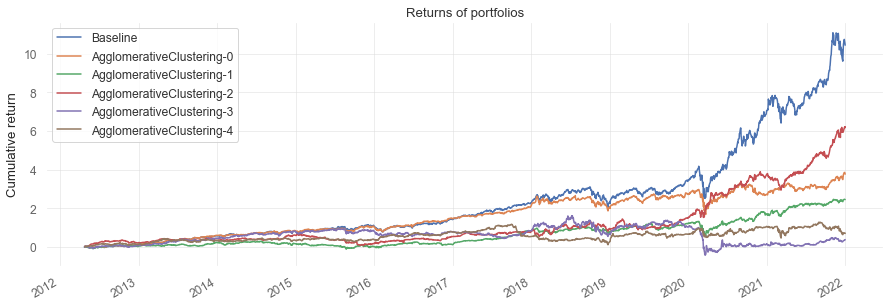

In [72]:
import matplotlib.pyplot as plt
from finclust.visualization import CumulativeReturnsVisualizator

visualizator = CumulativeReturnsVisualizator(
    figsize=(15, 5),
    # include_baseline=False,
)

visualizator.visualize(mgr)
plt.show()

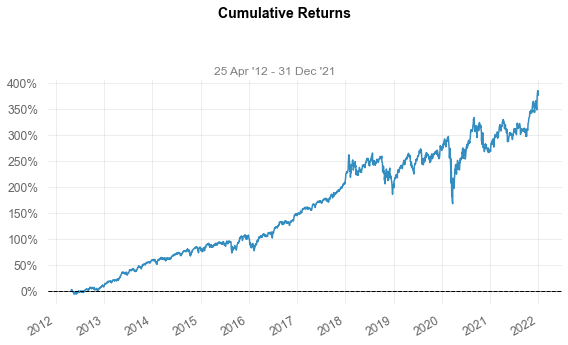

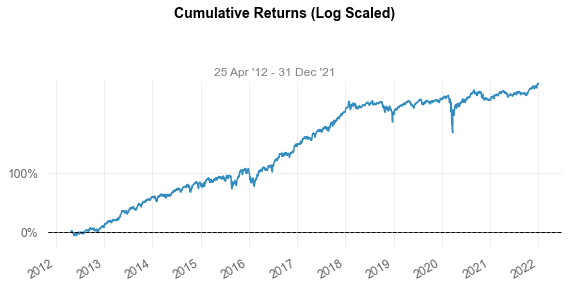

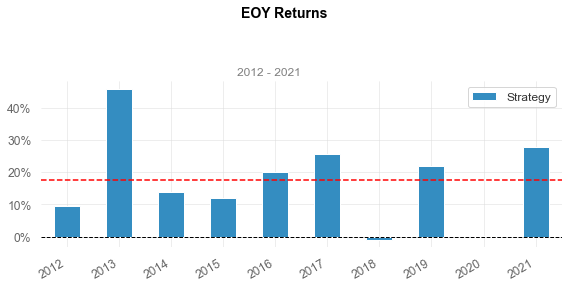

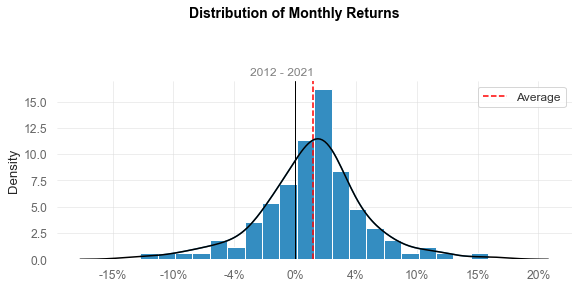

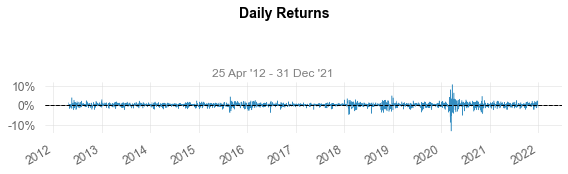

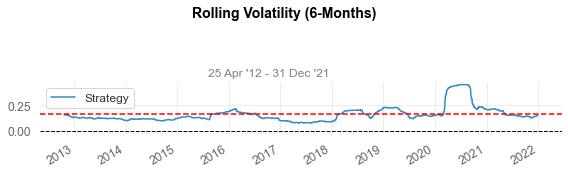

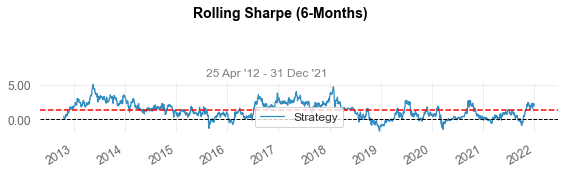

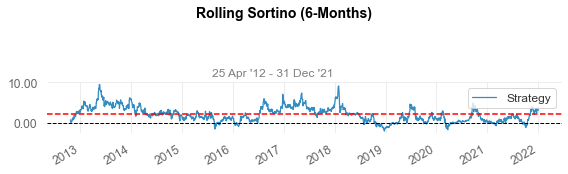

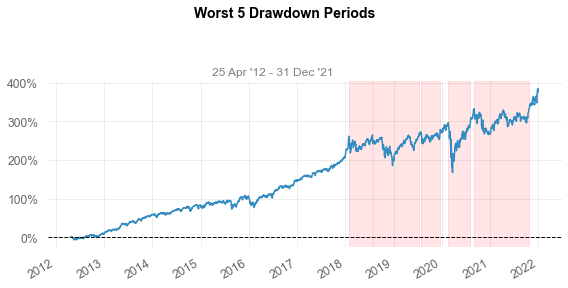

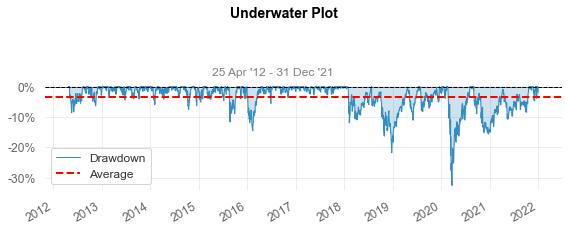

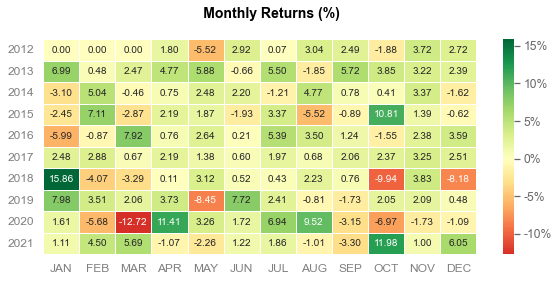

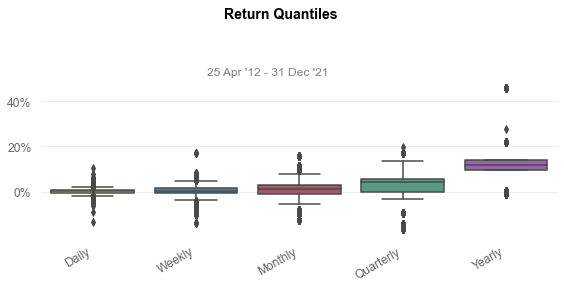

In [73]:
from finclust.visualization import QuantstatsVisualizator

visualizator = QuantstatsVisualizator(
    strategy_name="AgglomerativeClustering-0",
    mode="full",
)

visualizator.visualize(mgr)